In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Weather dataset

The dataset `weather_lab.csv` includes daily (min and max) temperature measured by a weather station
(366 data pairs).

We want to predict the MaxTemp based on the value of the MinTemp recorded. 

Since the output variable is continuous, this is a **regression problem**.

Your task is:
1. loading the dataset `weather_lab.csv` using pandas
2. counting the number of rows and the number of columns
3. splitting the dataset in inputs (denoted as X, that includes the column MinTemp) and output (denoted as y,  column MaxTemp) and transform it into a numpy array using `.values.`
4. plot the scatterplot of the data, this is the command

`plt.scatter(X,y)
plt.xlabel('MinTemp',fontsize=14)
plt.ylabel('MaxTemp',fontsize=14) `
5. Reshape X so it is a column vector `X=X.reshape(-1,1)`
6. randomly splitting the rows in (X,y) in training (60% of the rows) and testing (40% of the rows), you can use the function `train_test_split` from `sklearn`
7. training a `LinearRegression` model on the training dataset and predict the output variable for the testing dataset

`linreg = LinearRegression(fit_intercept=True)  
linreg.fit(x_train, y_train) #training the algorithm
y_pred_tr = linreg.predict(x_train)
y_pred_te = linreg.predict(x_test)`
8. computing the mean squared error (MSE) of the prediction error for the train and test set

`np.mean((y_pred_tr-y_train)**2)
np.mean((y_pred_te-y_test)**2)`

and root mean squared error (RMSE)


`np.sqrt(np.mean((y_pred_tr-y_train)**2))
np.sqrt(np.mean((y_pred_te-y_test)**2))`

RMSE gives the error in the same scale of `y`, 
e.g. RMSE=4 means that on average the error
in the predicted temperature is around $\pm 4$ degree.
9. You can plot the regression line as follows

`alpha = linreg.intercept_
beta = linreg.coef_[0]
plt.plot(X,alpha+beta*X,color='r')
plt.scatter(X,y)`


**Questions:**
10. Predict MaxTemp corresponding to the MinTemp=35, How do you that?
11. plot the predicted point together with the scatterplot of the data

In [4]:
df = pd.read_csv('./weather_lab.csv')
df

,MinTemp,MaxTemp
0,8.0,24.3
1,14.0,26.9
2,13.7,23.4
3,13.3,15.5
4,7.6,16.1
...,...,...
361,9.0,30.7
362,7.1,28.4
363,12.5,19.9
364,12.5,26.9


Text(0, 0.5, 'MaxTemp')

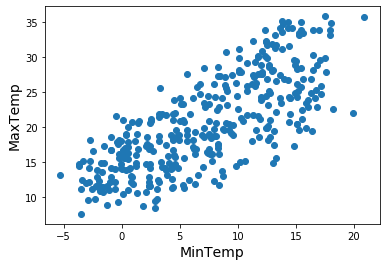

In [17]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
plt.scatter(X,y)
plt.xlabel('MinTemp',fontsize=14)
plt.ylabel('MaxTemp',fontsize=14)

In [24]:
X=X.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [25]:
linreg = LinearRegression(fit_intercept=True)  
linreg.fit(x_train, y_train) #training the algorithm
y_pred_tr = linreg.predict(x_train)
y_pred_te = linreg.predict(x_test)

In [29]:
np.mean((y_pred_tr-y_train)**2)

19.63048617827247

In [30]:
np.mean((y_pred_te-y_test)**2)

19.061527401730153

In [33]:
print(np.sqrt(np.mean((y_pred_tr-y_train)**2)))

np.sqrt(np.mean((y_pred_te-y_test)**2))

4.43063044930092


4.365950916092639

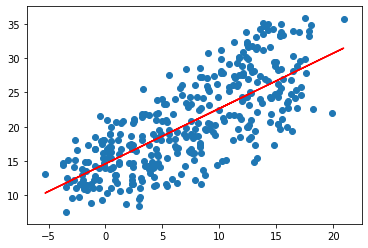

In [34]:
alpha = linreg.intercept_
beta = linreg.coef_[0]
plt.plot(X,alpha+beta*X,color='r')
plt.scatter(X,y)
